<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd



# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


import numpy as np

# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations


# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from src import soporte_encoding as se
from src import soporte_preprocesamiento as sp

In [2]:
df = pd.read_csv("data/online_shoppers_intention_clase_nonulls_estan_sinout.csv", index_col = 0)
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24,49751,2016-04-07 03:16:57,2990.0,6.0,-0.052593,0.607813,-0.016995
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,18300.0,5.0,0.385348,-0.015437,0.069147
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,Unknown,2016-03-14,90480,2016-04-05 12:47:46,9800.0,8.0,0.248162,-0.015437,-0.006227
3,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,1500.0,6.0,-0.210886,0.607813,-0.038530
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,3600.0,7.0,-0.242544,-0.887987,0.036844


In [3]:
df.dtypes

name                            object
seller                          object
offerType                       object
abtest                          object
vehicleType                     object
gearbox                         object
model                           object
fuelType                        object
brand                           object
notRepairedDamage               object
dateCreated                     object
postalCode                       int64
lastSeen                        object
price_knn                      float64
monthOfRegistration_knn        float64
powerCV_estandar               float64
kilometer_estandar             float64
yearOfRegistration_estandar    float64
dtype: object

- Nos interesa cambiar month of registration a object, ya que es una columna categórica

In [4]:
df["monthOfRegistration_knn"] = df["monthOfRegistration_knn"].astype("O")

In [5]:
df["provincia"] = df["postalCode"].apply(sp.obtener_provincia)

In [6]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ.remove("name")
lista_col_categ.remove("lastSeen")
lista_col_categ.remove("dateCreated")
lista_col_categ.remove("monthOfRegistration_knn")

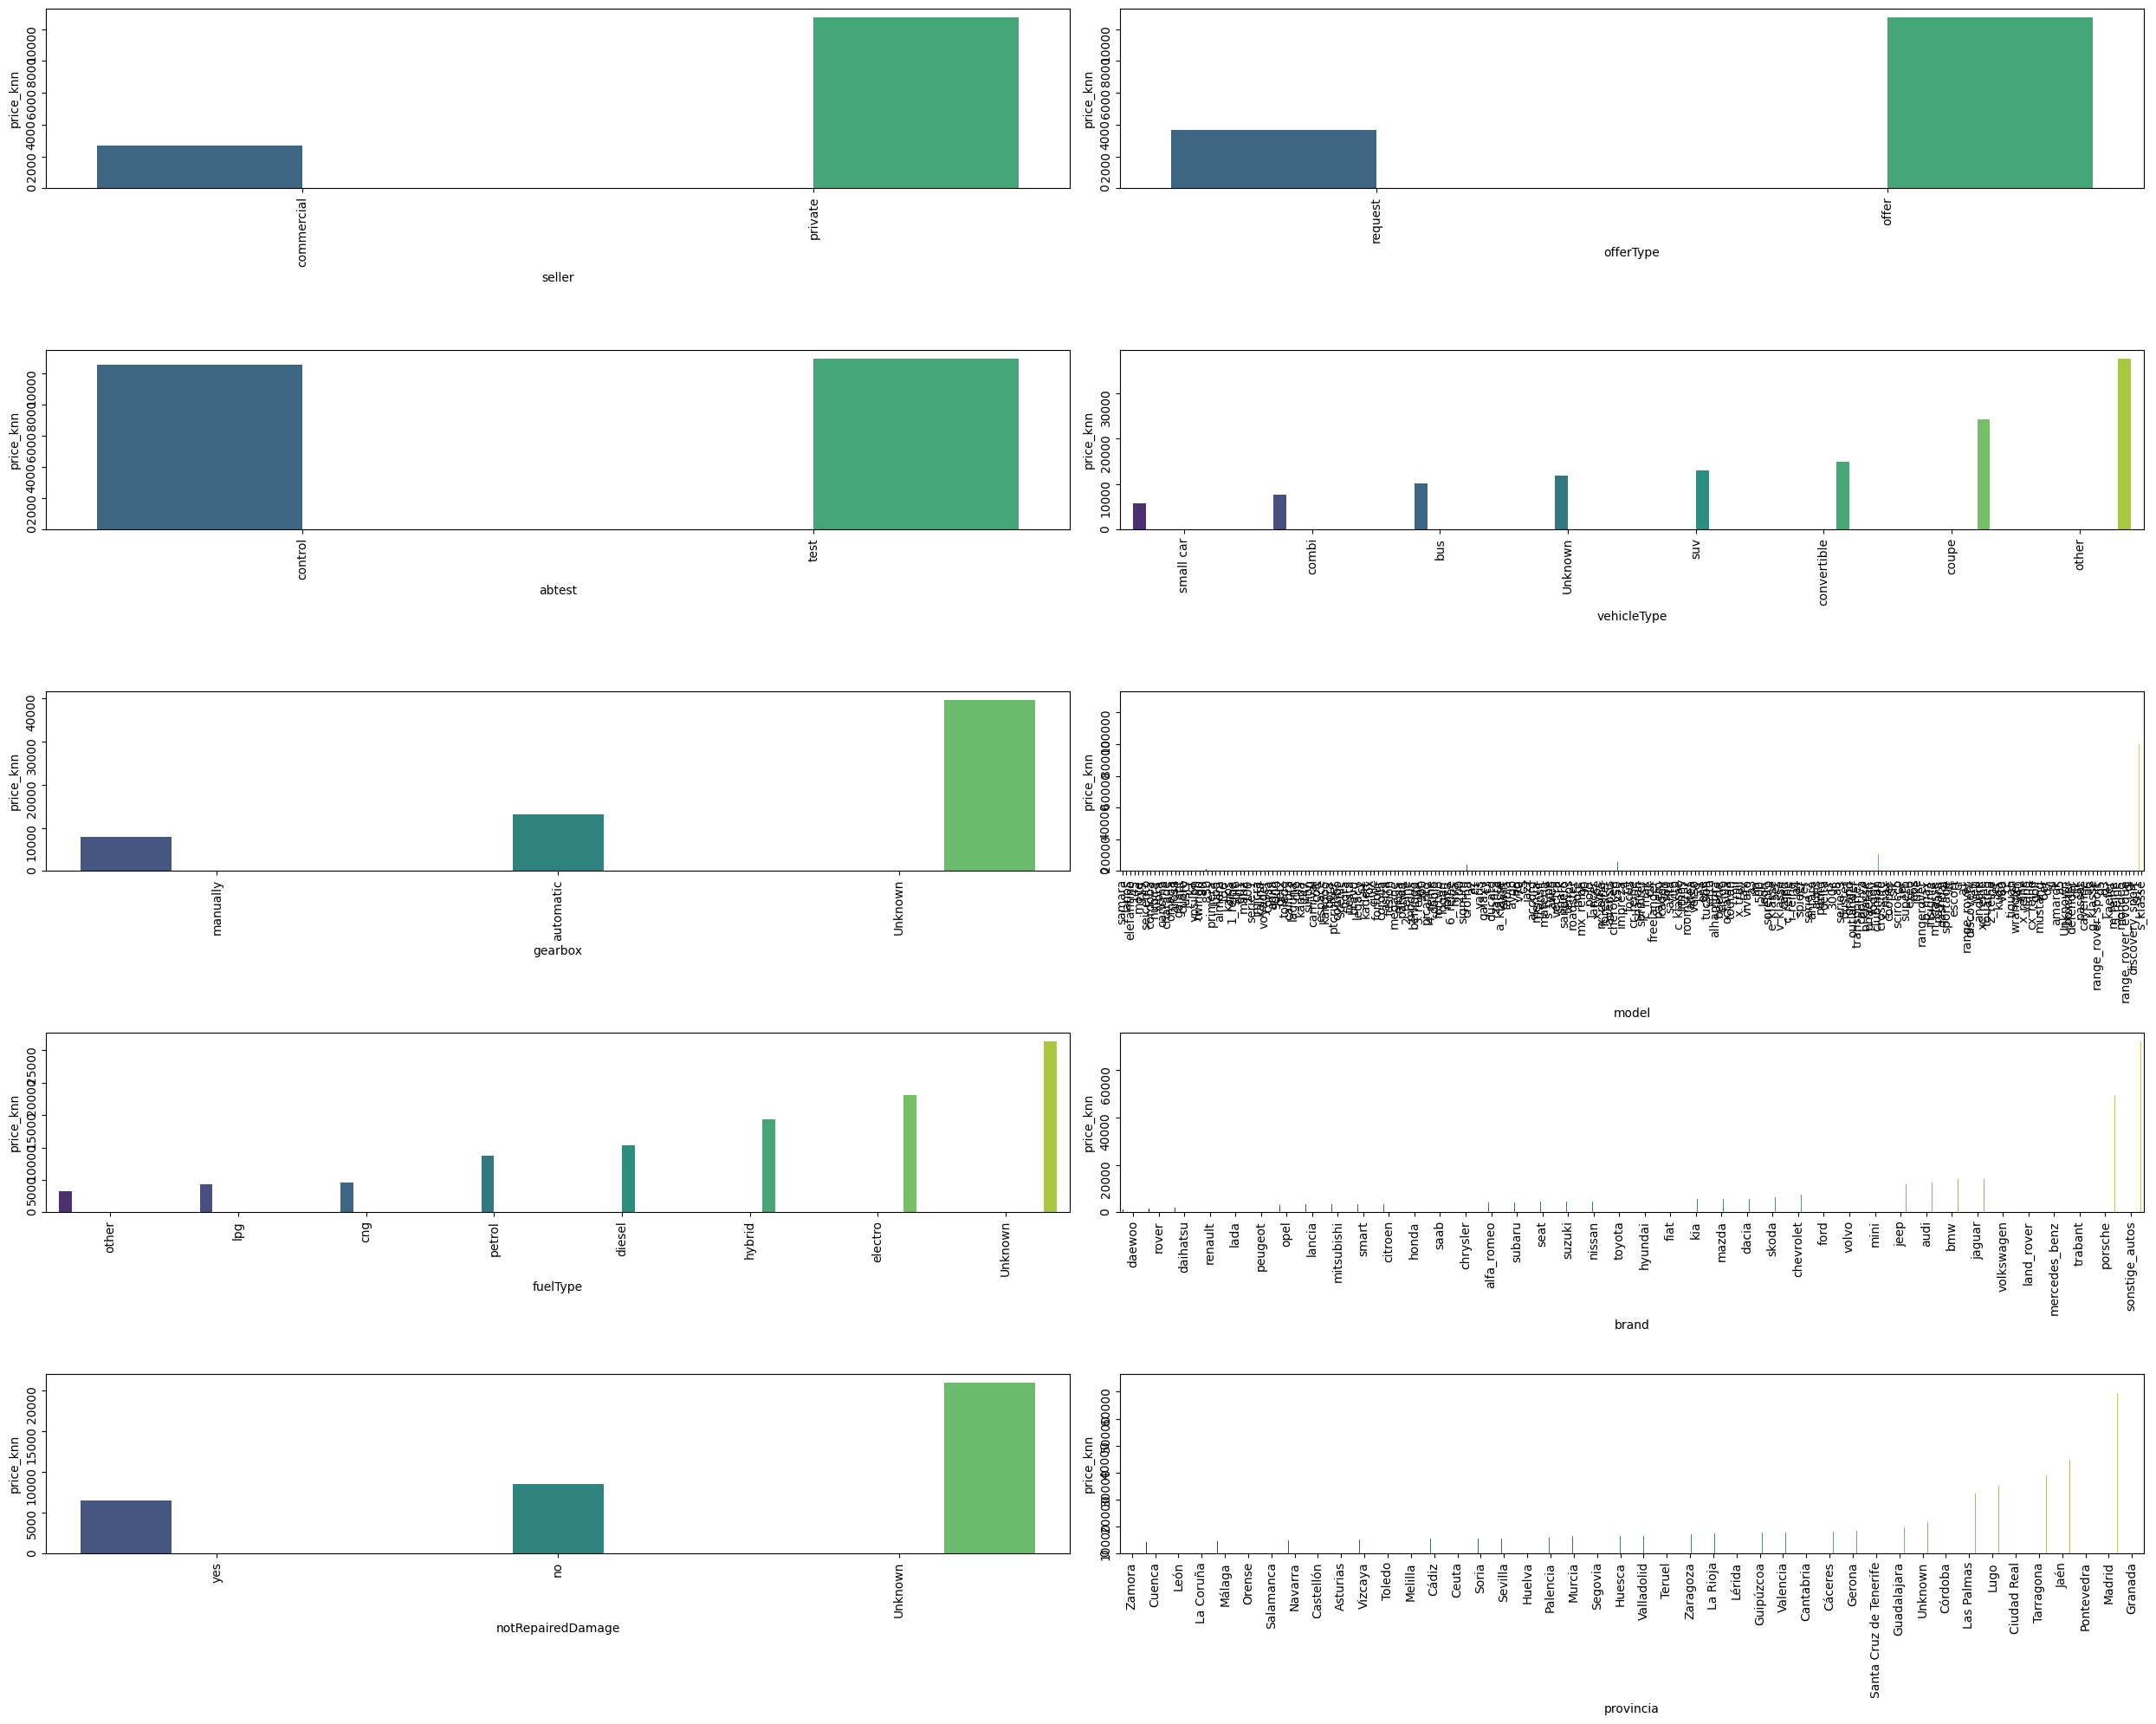

In [13]:
# # instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta = "price_knn", dataframe = df, lista_variables_categorias = lista_col_categ)

# # llamamos al método para hacer las gráficas
analisis_encoding.crear_barplot(tamano_grafica=(25,20))

In [8]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price_knn")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price_knn", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable SELLER
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 738945.5
Valor p: 0.327925139172358
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 3404752.5
Valor p: 0.0015484394852372317
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable ABTEST
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de M...
Estadístico del Test de Mann-Whitney U: 17203563929.5
Valor p: 0.45163894848284125
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']

Realizando test de K...
Estadístico de prueba: 44734.515453768356
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
14,16527.2655,0.0374,514.5438,32539.9872,combi-coupe
23,-18474.1372,0.0089,-34210.7104,-2737.5641,coupe-small car



###########################

Estamos analizando la variable GEARBOX
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'Unknown']

Realizando test de K...
Estadístico de prueba: 35866.3584119688
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-26519.6399,0.0,-38438.0227,-14601.2572,Unknown-automatic
1,-31665.5400,0.0,-42658.3958,-20672.6841,Unknown-manually



###########################

Estamos analizando la variable MODEL
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable model las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['golf', 'Unknown', 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max', '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse', 'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo', 'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', 'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'col

,meandiff,p-adj,lower,upper,group_diff
2165,104835.3254,0.0388,1361.7517,208308.8991,2_reihe-s_klasse
3838,99961.5884,0.0450,550.8742,199372.3026,5er-s_klasse
7258,99370.1196,0.0423,858.2639,197881.9753,a4-s_klasse
10247,104927.0601,0.0125,6654.1679,203199.9522,astra-s_klasse
13613,101310.7779,0.0335,2041.8044,200579.7513,c_klasse-s_klasse
17873,106029.7247,0.0084,8350.3767,203709.0728,corsa-s_klasse
20983,105354.8324,0.0258,3408.6689,207300.9959,fiesta-s_klasse
21128,102076.1668,0.0467,357.5502,203794.7835,focus-s_klasse
28718,102695.7112,0.0172,5163.9484,200227.4741,polo-s_klasse
30007,-106513.5346,0.0266,-209734.2629,-3292.8062,s_klasse-twingo



###########################

Estamos analizando la variable FUELTYPE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'Unknown', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de K...
Estadístico de prueba: 48486.33351520778
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
1,-15995.7170,0.0019,-28212.6847,-3778.7493,Unknown-diesel
6,-17644.9334,0.0001,-29087.8704,-6201.9964,Unknown-petrol



###########################

Estamos analizando la variable BRAND
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada']

Realizando test de K...
Estadístico de prueba: 50889.7035303756
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
32,68195.4771,0.0256,3069.0449,133321.9093,alfa_romeo-sonstige_autos
70,59541.8694,0.0000,17565.7607,101517.9781,audi-sonstige_autos
107,58391.6825,0.0000,16834.3542,99949.0108,bmw-sonstige_autos
212,68694.2857,0.0003,15973.2973,121415.2742,citroen-sonstige_autos
338,66934.9559,0.0000,19834.6569,114035.2550,fiat-sonstige_autos
367,63824.1834,0.0000,21205.6571,106442.7096,ford-sonstige_autos
395,68502.2770,0.0090,7034.5884,129969.9655,honda-sonstige_autos
422,66941.4707,0.0037,9600.0424,124282.8991,hyundai-sonstige_autos
497,66691.4950,0.0239,3280.3950,130102.5950,kia-sonstige_autos
583,66620.2717,0.0004,14939.8092,118300.7342,mazda-sonstige_autos



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Unknown', 'yes', 'no']

Realizando test de K...
Estadístico de prueba: 52997.02470860497
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-12374.1213,0.0000,-18715.2241,-6033.0186,Unknown-no
1,-14425.2493,0.0014,-24133.5603,-4716.9383,Unknown-yes



###########################

Estamos analizando la variable PROVINCIA
Para la columna price_knn, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable provincia las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Zamora', 'Unknown', 'Asturias', 'Guadalajara', 'Lugo', 'Salamanca', 'Sevilla', 'León', 'Santa Cruz de Tenerife', 'Las Palmas', 'Navarra', 'Castellón', 'Teruel', 'Cantabria', 'Málaga', 'Valencia', 'Cáceres', 'Huesca', 'Huelva', 'Vizcaya', 'Palencia', 'Jaén', 'Cádiz', 'Valladolid', 'Orense', 'La Rioja', 'Ceuta', 'Toledo', 'Segovia', 'Murcia', 'Ciudad Real', 'Soria', 'Madrid', 'La Coruña', 'Gerona', 'Lérida', 'Melilla', 'Córdoba', 'Zaragoza', 'Cuenca', 'Pontevedra', 'Granada', 'Guipúzcoa', 'Tarragona']

Realizando test de K...
Estadístico de prueba: 4823.979645421859
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
21,54107.7931,0.0476,188.6276,108026.9587,Asturias-Madrid
104,54322.4014,0.0396,887.4215,107757.3814,Castellón-Madrid
416,-59838.9780,0.0135,-114870.8691,-4807.0868,Granada-Zamora
599,51965.7015,0.0315,1629.8839,102301.5190,La Rioja-Madrid
648,55070.8269,0.0336,1491.5869,108650.0669,León-Madrid
718,-54367.0843,0.0445,-108288.2830,-445.8856,Madrid-Navarra
728,-52342.9321,0.0444,-104247.4054,-438.4588,Madrid-Teruel
729,-54064.6308,0.0143,-103948.3187,-4180.9429,Madrid-Toledo
730,-47906.3078,0.0054,-89857.2926,-5955.3230,Madrid-Unknown
732,-52813.9241,0.0478,-105458.2310,-169.6172,Madrid-Valladolid



###########################



In [9]:
diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {}, # no metemos ninguna columna
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ['seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
                        }

In [10]:
encoding = se.Encoding(df, diccionario_encoding, "price_knn")
df_hot_encoding = encoding.one_hot_encoding()
df_hot_encoding.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar,provincia
0,Golf_3_1.6,private,offer,test,Unknown,manually,golf,petrol,volkswagen,Unknown,2016-03-24,49751,2016-04-07 03:16:57,2990.0,6.0,-0.052593,0.607813,-0.016995,Zamora
1,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,Unknown,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,18300.0,5.0,0.385348,-0.015437,0.069147,Unknown
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,Unknown,2016-03-14,90480,2016-04-05 12:47:46,9800.0,8.0,0.248162,-0.015437,-0.006227,Unknown
3,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,1500.0,6.0,-0.210886,0.607813,-0.038530,Unknown
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,3600.0,7.0,-0.242544,-0.887987,0.036844,Unknown


In [11]:
df_target_enconding = encoding.target_encoding() 

MemoryError: Unable to allocate 136. GiB for an array with shape (371499, 49095) and data type float64

In [ ]:
from category_encoders import TargetEncoder
import pandas as pd

def target_encoding1(self, chunksize=10000):
    """
    Realiza codificación target en la variable especificada en el diccionario de codificación en lotes.

    Args:
    - chunksize: Número de filas a procesar en cada lote (por defecto 10000)

    Returns:
    - dataframe: DataFrame de pandas con codificación target aplicada.
    """
    col_encode = self.diccionario_encoding.get("target", [])
    
    if col_encode:
        if self.variable_respuesta not in self.dataframe.columns:
            raise ValueError(f"La variable de respuesta '{self.variable_respuesta}' no existe en el DataFrame.")
        
        # Instanciamos la clase TargetEncoder
        target_encoder = TargetEncoder(smooth="auto")
        
        # Aplicar fit en el DataFrame completo para entrenar el encoder
        target_encoder.fit(self.dataframe[col_encode], self.dataframe[self.variable_respuesta])
        
        # Procesamiento en chunks
        chunks = []
        for i in range(0, len(self.dataframe), chunksize):
            chunk = self.dataframe.iloc[i:i + chunksize]
            
            # Aplicar la transformación al chunk
            encoded_chunk = target_encoder.transform(chunk[col_encode])
            
            # Convertir a float32 para ahorrar memoria
            encoded_chunk = encoded_chunk.astype('float32')
            
            # Concatenar con el DataFrame de chunk original
            chunk = chunk.drop(columns=col_encode)
            chunk = pd.concat([chunk.reset_index(drop=True), encoded_chunk.reset_index(drop=True)], axis=1)
            
            # Añadir chunk procesado a la lista de chunks
            chunks.append(chunk)
        
        # Concatenar todos los chunks para formar el DataFrame final
        self.dataframe = pd.concat(chunks, axis=0).reset_index(drop=True)

    return self.dataframe


In [ ]:
class MiClase:
    def __init__(self, dataframe, diccionario_encoding, variable_respuesta):
        self.dataframe = dataframe
        self.diccionario_encoding = diccionario_encoding
        self.variable_respuesta = variable_respuesta

    def target_encoding(self, chunksize=10000):
        from category_encoders import TargetEncoder
import pandas as pd

def target_encoding1(self, chunksize=10000):
    """
    Realiza codificación target en la variable especificada en el diccionario de codificación en lotes.

    Args:
    - chunksize: Número de filas a procesar en cada lote (por defecto 10000)

    Returns:
    - dataframe: DataFrame de pandas con codificación target aplicada.
    """
    col_encode = self.diccionario_encoding.get("target", [])
    
    if col_encode:
        if self.variable_respuesta not in self.dataframe.columns:
            raise ValueError(f"La variable de respuesta '{self.variable_respuesta}' no existe en el DataFrame.")
        
        # Instanciamos la clase TargetEncoder
        target_encoder = TargetEncoder(smooth="auto")
        
        # Aplicar fit en el DataFrame completo para entrenar el encoder
        target_encoder.fit(self.dataframe[col_encode], self.dataframe[self.variable_respuesta])
        
        # Procesamiento en chunks
        chunks = []
        for i in range(0, len(self.dataframe), chunksize):
            chunk = self.dataframe.iloc[i:i + chunksize]
            
            # Aplicar la transformación al chunk
            encoded_chunk = target_encoder.transform(chunk[col_encode])
            
            # Convertir a float32 para ahorrar memoria
            encoded_chunk = encoded_chunk.astype('float32')
            
            # Concatenar con el DataFrame de chunk original
            chunk = chunk.drop(columns=col_encode)
            chunk = pd.concat([chunk.reset_index(drop=True), encoded_chunk.reset_index(drop=True)], axis=1)
            
            # Añadir chunk procesado a la lista de chunks
            chunks.append(chunk)
        
        # Concatenar todos los chunks para formar el DataFrame final
        self.dataframe = pd.concat(chunks, axis=0).reset_index(drop=True)

    return self.dataframe


In [ ]:
# Crear una instancia de MiClase con los parámetros necesarios
mi_instancia = MiClase(dataframe=df, diccionario_encoding=diccionario_encoding, variable_respuesta='target_column')

# Llamar al método target_encoding en la instancia
df_target_encoding = mi_instancia.target_encoding()

